## Lesson 16

### About this data: 
There are 6 netCDF files in the folder __OCEAN 215 - Autumn '20 - Course documents/2020-12-01 - lesson #16 data__/ \
Each netCDF file corresponds to a single profile made by Argo float number 59011095. We will be using all of these files to learn functions.

__File names:__
- D59011095_185.nc
- D59011095_186.nc
- D59011095_187.nc
- D59011095_188.nc
- D59011095_189.nc
- D59011095_190.nc



In [108]:
# Colab package management
# !pip install netcdf4

In [109]:
# Import statements
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Old method using copy/paste

In [103]:
filepath ='drive/My Drive/Data_folder/ARGO_floatdata/'
filename = 'D5901105_185.nc'

In [ ]:
# Import just one data file using xarray
data = xr.open_dataset(filepath+filename)
# display(data)

# Reformat the data to remove singleton dimensions
data = data.squeeze()
display(data)

# Get the lat and lon
lon = data['LONGITUDE'].values
lat = data['LATITUDE'].values

# Get the temperature and pressure

T = data['TEMP'].values
P = data['PRES'].values

In [ ]:
# Plot the temperature profile
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

# Make the plot
ax.plot(T, P, color='k', ls='-', lw=2, marker='o', label='Temperature')

# Format everything
ax.invert_yaxis()
ax.grid()
ax.set_xlabel('Temperature (˚C)', fontsize=16)
ax.set_ylabel('Pressure (dbar)', fontsize=16)
ax.set_title('Temperature profile: '+filename.split('.')[0])

plt.savefig('T_profile_185.png')

### New method using functions

In [123]:
# Create a function for reading the data
def prof_getdata(filepath,filename):
  # Load the file
  data = xr.open_dataset(filepath+filename)
  data = data.squeeze()

  # Get the data
  lat = data['LATITUDE'].values
  lon = data['LONGITUDE'].values
  T = data['TEMP'].values
  P = data['PRES'].values

  return T, P, lon, lat



# Create a function for plotting the temperature profile
def prof_plotting(T,P,filename,c='k',lw=2):
  # Plot the temperature profile
  fig = plt.figure(figsize=(10,10))
  ax = plt.axes()
  # Make the plot
  ax.plot(T, P, color=c, ls='-', lw=lw, marker='o', label='Temperature')
  # Format everything
  ax.invert_yaxis()
  ax.grid()
  ax.set_xlabel('Temperature (˚C)', fontsize=16)
  ax.set_ylabel('Pressure (dbar)', fontsize=16)
  ax.set_title('Temperature profile: '+filename.split('.')[0])
  plt.savefig('T_profile_'+filename.split('.')[0]+'.png')



In [124]:
# Get the file information for all the files
filepath = 'drive/My Drive/Data_folder/ARGO_floatdata/'
# filename = 'D5901105_186.nc'

filenames = ['D5901105_185.nc','D5901105_186.nc','D5901105_187.nc',
             'D5901105_188.nc','D5901105_189.nc','D5901105_190.nc']


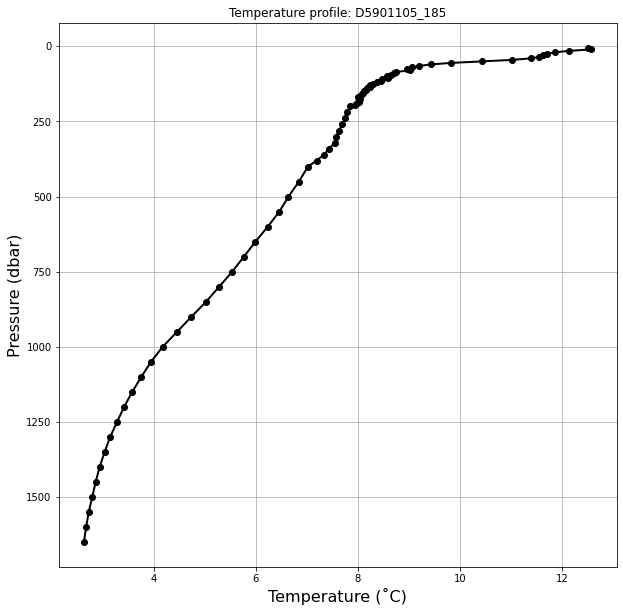

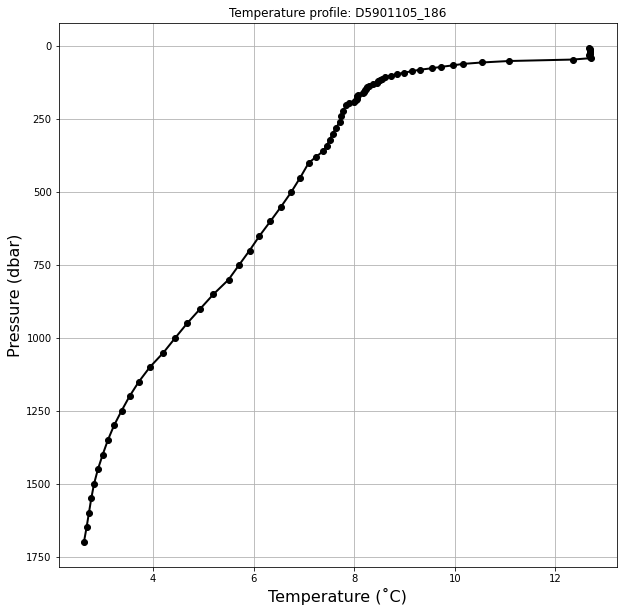

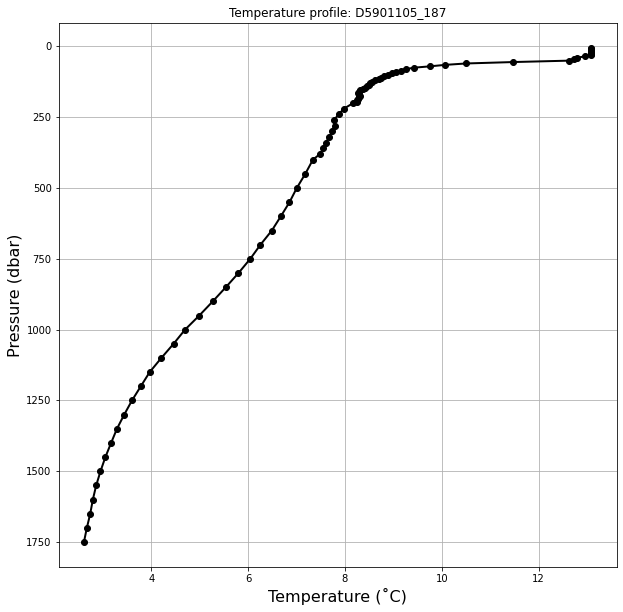

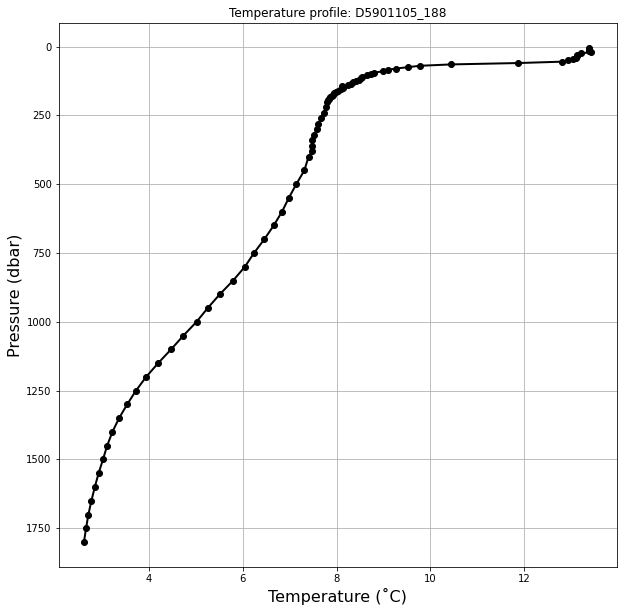

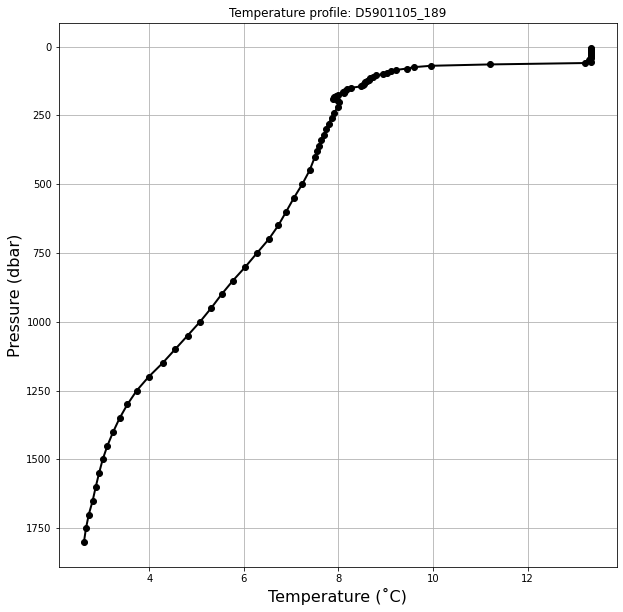

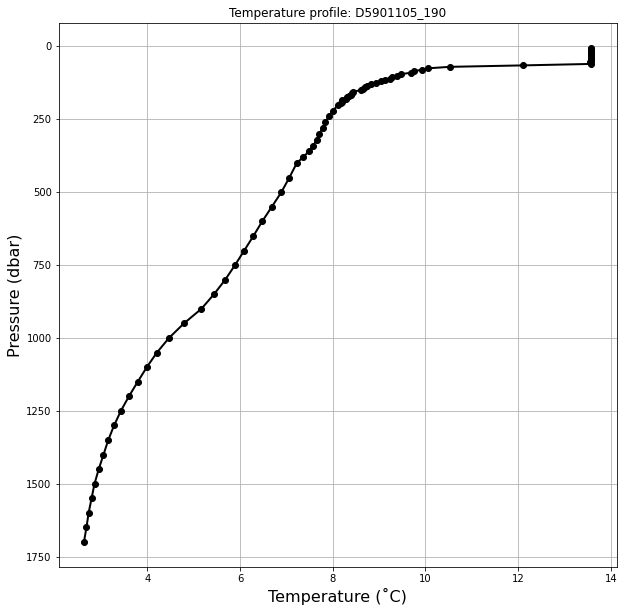

In [125]:
# Use the functions you just created in a for loop
for index in range(0,190):
  T, P, lon, lat = prof_getdata(filepath,filenames[index])
  prof_plotting(T,P,filenames[index])
  # print(T)


### Package management

In [ ]:
# Package management
# Run this cell only once per notebook then comment it out.
#-------------------------------------------------------------------------------

# This code allows xarray and netCDF4 to work with Google Colab
!pip install netcdf4

# This code installs TEOS-10 gsw
!pip install gsw

# This code installs cmocean
!pip install cmocean

# This code allows cartopy to work with Google Colab
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get -qq update
!apt-get -qq build-dep python3-cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely
!pip install Cartopy

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
from scipy import stats, interpolate
from datetime import datetime, timedelta
import gsw

import matplotlib.pyplot as plt
import cmocean

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [ ]:
dir(gsw)

In [12]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### String formatting

In [48]:
T = 10.71717
RH = 52.517985

print('Temperature = {T}˚C, Relative humidity= {RH}%'.format(RH=RH,T=T))

Temperature = 10.71717˚C, Relative humidity= 52.517985%


In [90]:
'{0:<6.3f}'.format(3.141592653589)

'3.142 '

In [131]:
filenames = []
for index in range(185,191):
  floatstring = 'D5901105_{:03d}.nc'.format(index)
  filenames.append(floatstring)

print(filenames)

['D5901105_185.nc', 'D5901105_186.nc', 'D5901105_187.nc', 'D5901105_188.nc', 'D5901105_189.nc', 'D5901105_190.nc']


In [ ]:
def read_profile(floatnum,profnum,filepath):
  profstring = 'D{0:d}_{1:03d}.nc'.format(floatnum,profnum)
  print(profstring)
  data = xr.open_dataset(filepath+profstring)
  data = data.squeeze()
  return data

filepath = 'drive/My Drive/Data_folder/ARGO_floatdata/'
data = read_profile(5901105,186,filepath)
display(data)

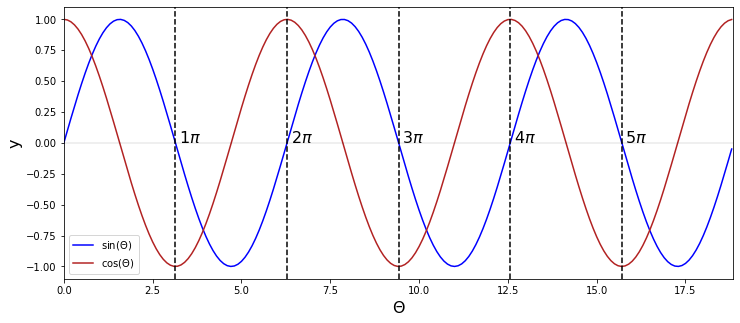

In [190]:
theta = np.arange(0,6*np.pi,0.1)
y1 = np.sin(theta)
y2 = np.cos(theta)

fs = 16

fig = plt.figure(figsize=(12,5))
plt.plot(theta,y1,'b',label='sin($\Theta$)')
plt.plot(theta,y2,c='firebrick',label='cos($\Theta$)')

plt.plot([0,6*np.pi],[0,0],'k-',lw=0.25,alpha=0.5)

for index in range(1,6):
  plt.plot([index*np.pi, index*np.pi], [-1.1,1.1],'k--')
  plt.text(index*np.pi+0.1,0,'{}$\pi$'.format(index),fontsize=fs)

plt.xlim([0,6*np.pi])
plt.ylim([-1.1,1.1])
plt.xlabel('$\Theta$',fontsize=fs)
plt.ylabel('y',fontsize=fs)

plt.legend()


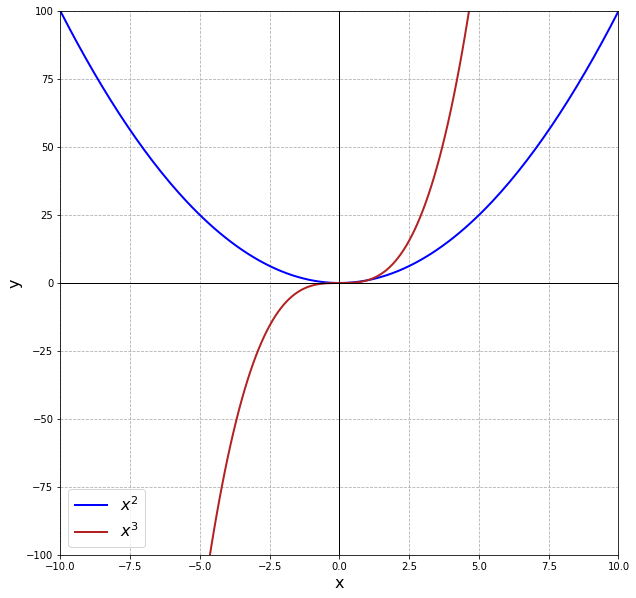

In [188]:
x = np.arange(-10,11,0.1)
y1 = x**2
y2 = x**3

fs = 16

fig = plt.figure(figsize=(10,10))
plt.plot(x,y1,'b',lw=2,label='$x^2$')
plt.plot(x,y2,c='firebrick',lw=2,label='$x^3$')


plt.plot([-10,10],[0,0],'k-',lw=1)
plt.plot([0,0],[-100,100],'k-',lw=1)

plt.ylim([-100,100])
plt.xlim([-10,10])
plt.grid(ls='--')

plt.xlabel('x',fontsize=fs)
plt.ylabel('y',fontsize=fs)
plt.legend(fontsize=fs)

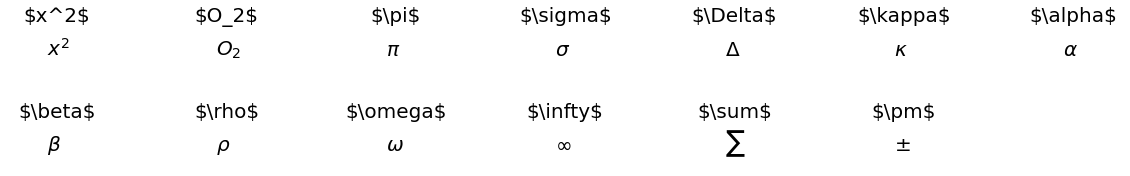

In [265]:
strings = ['$x^2$','$O_2$','$\pi$','$\sigma$','$\Delta$','$\kappa$','$\\alpha$',
           '$\\beta$','$\\rho$','$\omega$','$\infty$','$\sum$','$\pm$']

fig = plt.figure(figsize=(20,2))
for index in range(0,13):
  ax = fig.add_subplot(2,7,index+1)
  plt.text(0.4,0.4,strings[index],fontsize=fs)
  plt.title('\\'+strings[index],fontsize=fs)
  plt.axis('off')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.1, wspace=0.7)